<a href="https://colab.research.google.com/github/mrsbelema/belema/blob/main/belemakio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Data Visualization Enhancements
sns.set(style="whitegrid")

In [18]:
# Load and preprocess the dataset
def load_and_preprocess_data(url):
    columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
               'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
    data = pd.read_csv(url, header=None, names=columns)

    # Remove problematic rows (if any) containing non-numeric entries
    if 'age' in data.values:
        data = data[pd.to_numeric(data['age'], errors='coerce').notna()]
        # Replace "?" with NaN and drop rows with missing values
        data.replace("?", np.nan, inplace=True) # This line was incorrectly indented
    data.dropna(inplace=True)
    # Convert all columns to numeric
    data = data.apply(pd.to_numeric)
    # Adjust target variable to binary (0 = no disease, 1 = disease)
    data['target'] = data['target'].apply(lambda x: 1 if x > 0 else 0) # Corrected indentation
    return data

In [22]:
# Function for EDA
def perform_eda(data):
    print("Dataset Overview:")
    print(data.describe())
    print("\nMissing Values:", data.isnull().sum())

    # Plot feature correlations
    plt.figure(figsize=(12, 10))
    sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
    plt.title("Feature Correlation Heatmap")
    plt.show()

    # Target distribution
    sns.countplot(data['target'], palette="viridis")
    plt.title("Target Distribution (0 = No Heart Disease, 1 = Heart Disease)")
    plt.xlabel("Target")
    plt.ylabel("Count")
    plt.show() # Added this line for displaying the plot within the function

In [23]:
# Train-test split and scaling
def split_and_scale_data(data):
    X = data.drop('target', axis=1)
    y = data['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test


In [26]:
# Function to evaluate models
def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f"\n{model_name} Evaluation:")
    print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}, AUC: {auc:.2f}")
    print("Confusion Matrix:\n", cm)

    return accuracy, precision, recall, f1, auc, cm

In [27]:
# Function to plot ROC curve
def plot_roc_curve(model, X_test, y_test, model_name):
    y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc_score(y_test, y_prob):.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

In [28]:
# Main execution
url = "/content/heart (1).csv"
data = load_and_preprocess_data(url)


Dataset Overview:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      

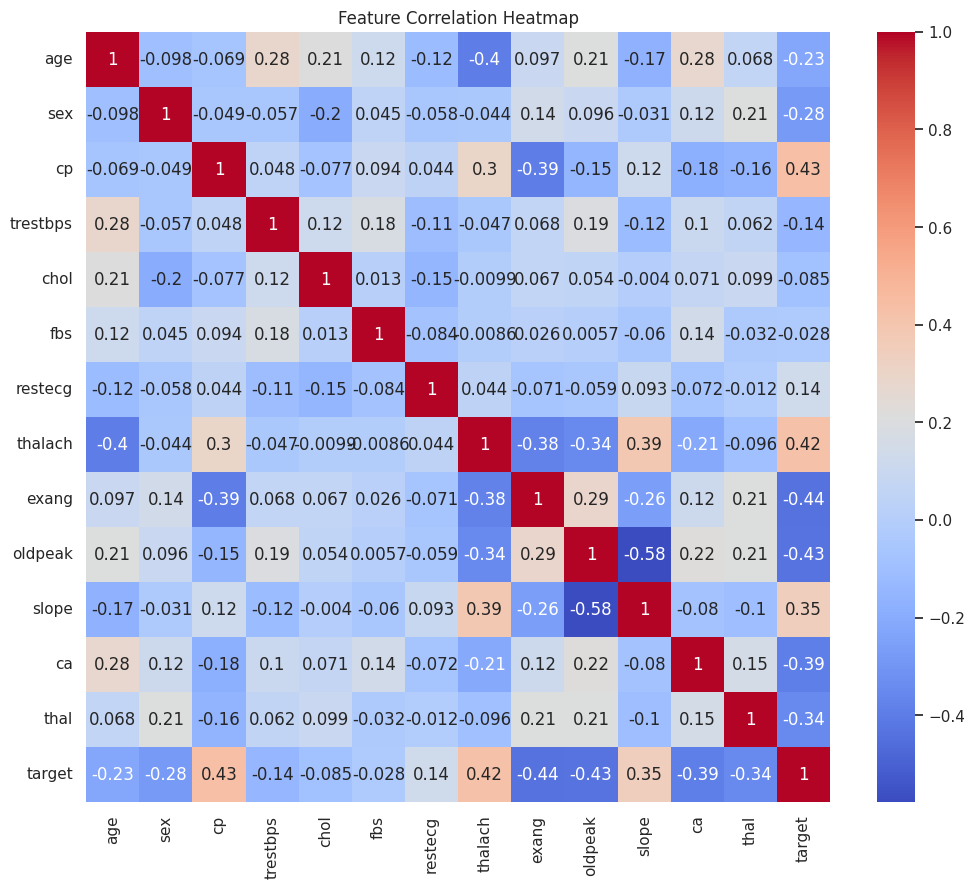

<ipython-input-22-538e792654e5>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['target'], palette="viridis")


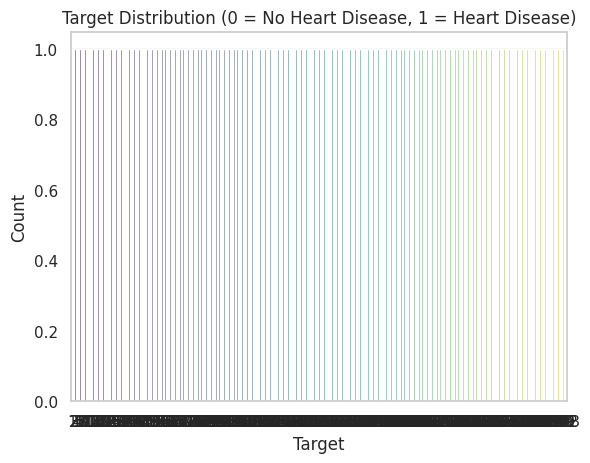

In [29]:
# Perform EDA
perform_eda(data)

In [30]:
# Split and scale data
X_train, X_test, y_train, y_test = split_and_scale_data(data)

In [31]:
# Initialize PCA
n_components = 5
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [32]:
# Initialize models
logistic_model = LogisticRegression(random_state=42)
tree_model = DecisionTreeClassifier(random_state=42)
svm_model = SVC(probability=True, random_state=42)


Logistic Regression Evaluation:
Accuracy: 0.89, Precision: 0.88, Recall: 0.91, F1 Score: 0.89, AUC: 0.88
Confusion Matrix:
 [[25  4]
 [ 3 29]]


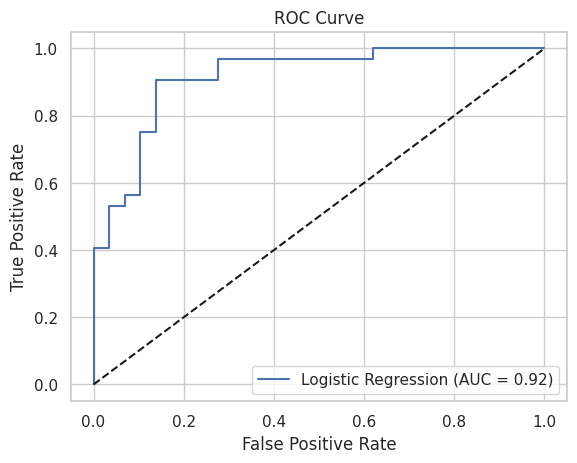

In [38]:
# Train and evaluate Logistic Regression
logistic_model.fit(X_train_pca, y_train)
log_accuracy, log_precision, log_recall, log_f1, log_auc, log_cm = evaluate_model(logistic_model, X_test_pca, y_test, "Logistic Regression")
plot_roc_curve(logistic_model, X_test_pca, y_test, "Logistic Regression")



Decision Tree Evaluation:
Accuracy: 0.80, Precision: 0.92, Recall: 0.69, F1 Score: 0.79, AUC: 0.81
Confusion Matrix:
 [[27  2]
 [10 22]]


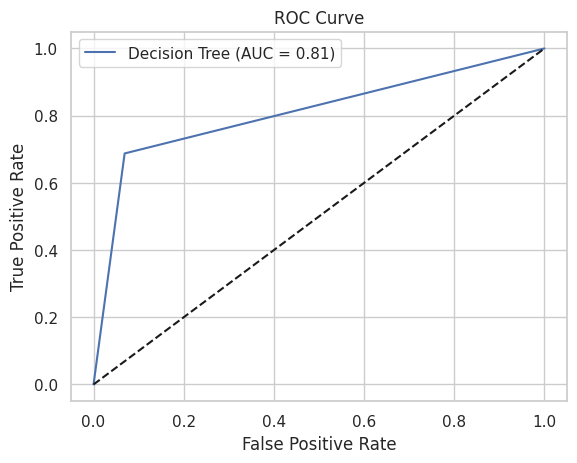

In [37]:
# Train and evaluate Decision Tree
tree_model.fit(X_train_pca, y_train)
tree_accuracy, tree_precision, tree_recall, tree_f1, tree_auc, tree_cm = evaluate_model(tree_model, X_test_pca, y_test, "Decision Tree")
plot_roc_curve(tree_model, X_test_pca, y_test, "Decision Tree")



SVM Evaluation:
Accuracy: 0.89, Precision: 0.88, Recall: 0.91, F1 Score: 0.89, AUC: 0.88
Confusion Matrix:
 [[25  4]
 [ 3 29]]


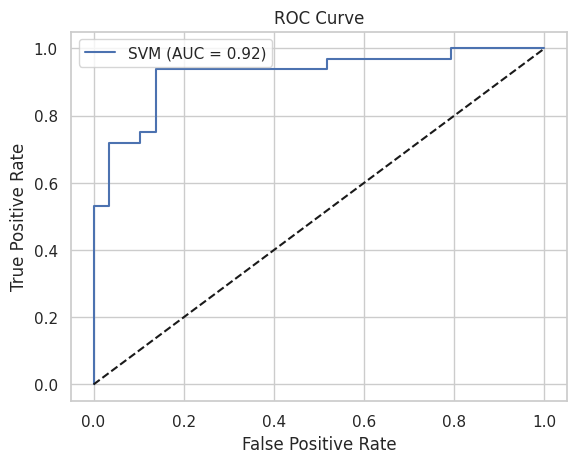

In [35]:
# Train and evaluate SVM
svm_model.fit(X_train_pca, y_train)
svm_accuracy, svm_precision, svm_recall, svm_f1, svm_auc, svm_cm = evaluate_model(svm_model, X_test_pca, y_test, "SVM")
plot_roc_curve(svm_model, X_test_pca, y_test, "SVM")


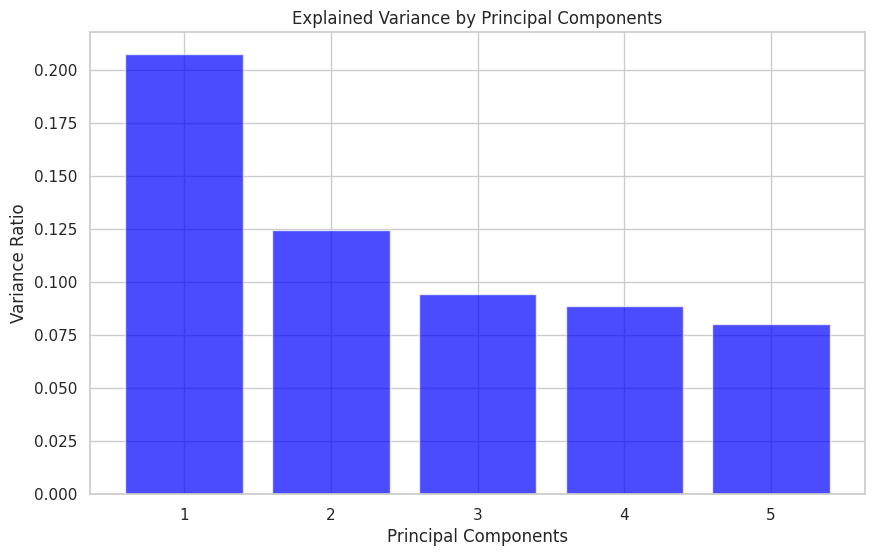

In [36]:
# Visualize PCA Variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, n_components + 1), pca.explained_variance_ratio_, color='blue', alpha=0.7)
plt.xlabel('Principal Components')
plt.ylabel('Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.show()